# NLP with oil and renewable energies project

#### Get libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

## Creating month weights

In [2]:
corpus_oil_price=pd.read_csv("data/corpus_oil_price.csv", index_col=0)
corpus_alternative_energies=pd.read_csv("data/corpus_alternative_energies.csv", index_col=0)
corpus_crude_oil=pd.read_csv("data/corpus_crude_oil.csv", index_col=0)

In [3]:
corpus_oil_price["date_published"] = pd.to_datetime(corpus_oil_price["date_published"], utc=True)
corpus_alternative_energies["date_published"] = pd.to_datetime(corpus_alternative_energies["date_published"], utc=True)
corpus_crude_oil["date_published"] = pd.to_datetime(corpus_crude_oil["date_published"], utc=True)
corpus_crude_oil


,Unnamed: 0.1,title,date_published,content,baseline_sentiment,vader_sentiment
0,0,Oil Bulls Rejoice As Biden's Supply Strategy B...,2021-11-25 00:00:00+00:00,President Biden&rsquo;s threat to oil producer...,-1,-0.9926
1,1,"OPEC To Add 400,000 Bpd In January Despite Oil...",2021-12-02 14:53:55+00:00,The OPEC group is sticking to its plan to ease...,0,0.4497
2,2,UAE Pumps $6 Billion Into Oil And Gas Expansio...,2021-11-24 23:00:00+00:00,The U.S.-sponsored &lsquo;relationship normali...,1,0.9875
3,3,China Keeps Markets In The Dark About SPR Release,2021-11-24 22:00:00+00:00,The volume of the expected Chinese release of ...,-1,-0.9552
4,4,Oil Markets Unimpressed By Small Crude Invento...,2021-11-24 15:36:00+00:00,"Crude oil inventories rose last week, while ga...",-1,-0.9601
...,...,...,...,...,...,...
5000,5000,A Detailed Guide on the Many Different Types o...,2009-12-02 23:12:01+00:00,Some people arbitrarily speak about oil as if ...,-1,-0.9962
5001,5001,What is Peak Oil Theory A Thorough Look at Thi...,2009-10-21 21:17:44+00:00,Currently there is a lot of debate going on re...,1,-0.1567
5002,5002,Oil Shale - So Just What Is It,2009-09-24 22:26:55+00:00,People often say &ldquo;You can&rsquo;t squeez...,-1,0.9816
5003,5003,Oil is not a Villain Here's what it's done for us,2009-09-21 21:45:02+00:00,"For decades now, oil has often been vilified a...",1,0.9987


In [4]:
corpus_oil_price_resampled = corpus_oil_price.resample('M', on='date_published').mean()
corpus_alternative_energies_resampled = corpus_alternative_energies.resample('M', on='date_published').mean()
corpus_crude_oil_resampled = corpus_crude_oil.resample('M', on='date_published').mean()

In [5]:
corpus_oil_price_resampled.index = pd.to_datetime(corpus_oil_price_resampled.index).strftime('%Y-%m')
corpus_alternative_energies_resampled.index = pd.to_datetime(corpus_alternative_energies_resampled.index).strftime('%Y-%m')
corpus_crude_oil_resampled.index = pd.to_datetime(corpus_crude_oil_resampled.index).strftime('%Y-%m')
corpus_crude_oil_resampled

,Unnamed: 0.1,baseline_sentiment,vader_sentiment
date_published,,,
2009-07,5004.000000,-1.000000,-0.987900
2009-08,NaN,NaN,NaN
2009-09,5002.500000,0.000000,0.990150
2009-10,5001.000000,1.000000,-0.156700
2009-11,NaN,NaN,NaN
...,...,...,...
2021-08,227.863636,-0.090909,0.196308
2021-09,153.280000,-0.120000,0.031880
2021-10,88.098039,-0.098039,0.201992


### Regression with oil prices (time series analysis)

In [6]:
corpus_oil_price_resampled

,baseline_sentiment,vader_sentiment
date_published,,
2009-11,1.000000,0.998550
2009-12,-1.000000,0.098200
2010-01,0.000000,0.128680
2010-02,0.000000,0.567283
2010-03,0.111111,0.848289
...,...,...
2021-08,-0.560000,-0.545292
2021-09,-0.250000,-0.237639
2021-10,-0.476190,-0.447929


In [7]:
corpus_oil_price_resampled.isna().sum()

baseline_sentiment    4
vader_sentiment       4
dtype: int64

In [8]:
is_NaN = corpus_oil_price_resampled.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = corpus_oil_price_resampled[row_has_NaN]
rows_with_NaN

,baseline_sentiment,vader_sentiment
date_published,,
2012-11,NaN,NaN
2013-05,NaN,NaN
2013-07,NaN,NaN
2014-01,NaN,NaN


In [9]:
corpus_oil_price_resampled.index = pd.to_datetime(corpus_oil_price_resampled.index)
corpus_oil_price_resampled['vader_sentiment'].interpolate(method='polynomial', order=2, inplace=True)

In [10]:
is_NaN = corpus_oil_price_resampled.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = corpus_oil_price_resampled[row_has_NaN]
rows_with_NaN

,baseline_sentiment,vader_sentiment
date_published,,
2012-11-01,NaN,-0.399684
2013-05-01,NaN,0.977149
2013-07-01,NaN,0.123677
2014-01-01,NaN,0.422792


In [11]:
corpus_oil_price_resampled.to_csv('data/corpus_oil_price_resampled2.csv')
corpus_oil_price_resampled

,baseline_sentiment,vader_sentiment
date_published,,
2009-11-01,1.000000,0.998550
2009-12-01,-1.000000,0.098200
2010-01-01,0.000000,0.128680
2010-02-01,0.000000,0.567283
2010-03-01,0.111111,0.848289
...,...,...
2021-08-01,-0.560000,-0.545292
2021-09-01,-0.250000,-0.237639
2021-10-01,-0.476190,-0.447929


In [12]:
corpus_oil_price_resampled=pd.read_csv("data/corpus_oil_price_resampled2.csv", index_col=0)

In [13]:
oil_price=pd.read_csv("data/oil_prices.csv", index_col=0)
oil_price

,Brent
date_published,
2009-11-01,76.66
2009-12-01,74.46
2010-01-01,76.17
2010-02-01,73.75
2010-03-01,78.83
...,...
2021-08-01,70.75
2021-09-01,74.49
2021-10-01,83.54


In [14]:
corpus_oil_price_resampled2 = corpus_oil_price_resampled.merge(oil_price, on="date_published")
corpus_oil_price_resampled2.drop(columns=['baseline_sentiment'])

,vader_sentiment,Brent
date_published,,
2009-11-01,0.998550,76.66
2009-12-01,0.098200,74.46
2010-01-01,0.128680,76.17
2010-02-01,0.567283,73.75
2010-03-01,0.848289,78.83
...,...,...
2021-08-01,-0.545292,70.75
2021-09-01,-0.237639,74.49
2021-10-01,-0.447929,83.54


In [15]:
corpus_oil_price_resampled2.drop(corpus_oil_price_resampled2.tail(1).index,inplace=True)
corpus_oil_price_resampled2

,baseline_sentiment,vader_sentiment,Brent
date_published,,,
2009-11-01,1.000000,0.998550,76.66
2009-12-01,-1.000000,0.098200,74.46
2010-01-01,0.000000,0.128680,76.17
2010-02-01,0.000000,0.567283,73.75
2010-03-01,0.111111,0.848289,78.83
...,...,...,...
2021-07-01,-0.677419,-0.319545,75.17
2021-08-01,-0.560000,-0.545292,70.75
2021-09-01,-0.250000,-0.237639,74.49


<AxesSubplot:xlabel='date_published'>

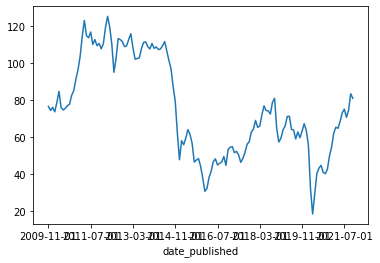

In [16]:
corpus_oil_price_resampled2.Brent.plot()

In [17]:
corpus_oil_price_resampled2['Brent-1'] = corpus_oil_price_resampled2['Brent'].shift(1)
corpus_oil_price_resampled2

,baseline_sentiment,vader_sentiment,Brent,Brent-1
date_published,,,,
2009-11-01,1.000000,0.998550,76.66,NaN
2009-12-01,-1.000000,0.098200,74.46,76.66
2010-01-01,0.000000,0.128680,76.17,74.46
2010-02-01,0.000000,0.567283,73.75,76.17
2010-03-01,0.111111,0.848289,78.83,73.75
...,...,...,...,...
2021-07-01,-0.677419,-0.319545,75.17,73.16
2021-08-01,-0.560000,-0.545292,70.75,75.17
2021-09-01,-0.250000,-0.237639,74.49,70.75


In [18]:
corpus_oil_price_resampled2.drop(index='2009-11-01', columns='baseline_sentiment')

,vader_sentiment,Brent,Brent-1
date_published,,,
2009-12-01,0.098200,74.46,76.66
2010-01-01,0.128680,76.17,74.46
2010-02-01,0.567283,73.75,76.17
2010-03-01,0.848289,78.83,73.75
2010-04-01,0.104390,84.82,78.83
...,...,...,...
2021-07-01,-0.319545,75.17,73.16
2021-08-01,-0.545292,70.75,75.17
2021-09-01,-0.237639,74.49,70.75


In [20]:
corpus_oil_price_resampled2 = corpus_oil_price_resampled2[['Brent', 'vader_sentiment']]

### Separating data

In [22]:
data_train = corpus_oil_price_resampled2[corpus_oil_price_resampled2.index < '2019-01-01'].copy()
data_train.dropna(inplace=True)
data_train

,Brent,vader_sentiment
date_published,,
2009-11-01,76.66,0.998550
2009-12-01,74.46,0.098200
2010-01-01,76.17,0.128680
2010-02-01,73.75,0.567283
2010-03-01,78.83,0.848289
...,...,...
2018-08-01,72.53,-0.723733
2018-09-01,78.89,-0.662444
2018-10-01,81.03,-0.770875


In [23]:
data_testing = corpus_oil_price_resampled2[corpus_oil_price_resampled2.index >= '2019-01-01'].copy()
data_testing

,Brent,vader_sentiment
date_published,,
2019-01-01,59.41,-0.053473
2019-02-01,63.96,-0.512719
2019-03-01,66.14,-0.584344
2019-04-01,71.23,-0.194786
2019-05-01,71.32,-0.757917
2019-06-01,64.22,-0.724669
2019-07-01,63.92,-0.714008
2019-08-01,59.04,-0.469124
2019-09-01,62.83,-0.545794


In [24]:
training_data = data_train
training_data.dropna(inplace=True)

training_data.head()

,Brent,vader_sentiment
date_published,,
2009-11-01,76.66,0.998550
2009-12-01,74.46,0.098200
2010-01-01,76.17,0.128680
2010-02-01,73.75,0.567283
2010-03-01,78.83,0.848289


In [25]:
#MinMaxScaler is used to normalize the data
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.48506596, 1.        ],
       [0.46184697, 0.54788089],
       [0.47989446, 0.5631867 ],
       [0.45435356, 0.78343544],
       [0.50796834, 0.92454499],
       [0.57118734, 0.55098925],
       [0.47757256, 0.30680139],
       [0.46501319, 0.62234107],
       [0.47366755, 0.53302953],
       [0.48907652, 0.58694051],
       [0.49751979, 0.18668489],
       [0.54849604, 0.01719896],
       [0.57604222, 0.20912423],
       [0.64116095, 0.00805966],
       [0.69467018, 0.40479562],
       [0.77065963, 0.28201265],
       [0.88591029, 0.66199972],
       [0.97688654, 0.5863965 ],
       [0.88960422, 0.42370462],
       [0.87736148, 0.45000287],
       [0.91050132, 0.19089944],
       [0.83926121, 0.18106723],
       [0.86680739, 0.25091016],
       [0.83218997, 0.16563724],
       [0.84506596, 0.20415286],
       [0.8144591 , 0.42016026],
       [0.84422164, 0.18504341],
       [0.93540897, 0.42824423],
       [1.        , 0.36278079],
       [0.93984169, 0.99704981],
       [0.

In [46]:
X_train = [] 
Y_train = []
training_data.shape[0]
for i in range(10, training_data.shape[0]):
    X_train.append(training_data[i-10:i])
    Y_train.append(training_data[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape

(100, 10, 2)

In [47]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()
# LSTM layer 1
regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], 2)))
regressor.add(Dropout(0.2))
# LSTM layer 2,3,4
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))
# LSTM layer 5
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
# Fully connected layer
regressor.add(Dense(units = 1))
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
#Fitting the RNN model
history= regressor.fit(X_train, Y_train, epochs = 20, batch_size =50, validation_split=0.1)

Epoch 1/20
2/2 [==============================] - 9s 2s/step - loss: 0.3877 - val_loss: 0.1633
Epoch 2/20
2/2 [==============================] - 0s 51ms/step - loss: 0.3402 - val_loss: 0.1251
Epoch 3/20
2/2 [==============================] - 0s 51ms/step - loss: 0.2824 - val_loss: 0.0758
Epoch 4/20
2/2 [==============================] - 0s 49ms/step - loss: 0.2052 - val_loss: 0.0224
Epoch 5/20
2/2 [==============================] - 0s 49ms/step - loss: 0.1082 - val_loss: 0.0165
Epoch 6/20
2/2 [==============================] - 0s 50ms/step - loss: 0.1008 - val_loss: 0.0882
Epoch 7/20
2/2 [==============================] - 0s 49ms/step - loss: 0.1163 - val_loss: 0.0419
Epoch 8/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0809 - val_loss: 0.0110
Epoch 9/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0728 - val_loss: 0.0054
Epoch 10/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0749 - val_loss: 0.0065
Epoch 11/20
2/2 [==============

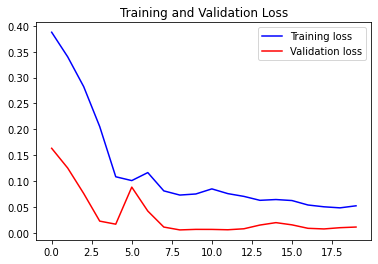

In [48]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [49]:
part_60_days = data_train.tail(10)
df= part_60_days.append(data_testing, ignore_index = True)
df.head()

,Brent,vader_sentiment
0,66.02,-0.370967
1,72.11,-0.202176
2,76.98,-0.473047
3,74.41,-0.575300
4,74.25,-0.733743


In [50]:
inputs = scaler.transform(df) 
inputs

array([[ 0.37277045,  0.31228449],
       [ 0.43704485,  0.39704405],
       [ 0.48844327,  0.26102407],
       [ 0.46131926,  0.20967661],
       [ 0.45963061,  0.13011306],
       [ 0.44147757,  0.13513943],
       [ 0.50860158,  0.16591622],
       [ 0.53118734,  0.11146681],
       [ 0.35936675,  0.20707794],
       [ 0.28137203,  0.2968132 ],
       [ 0.30300792,  0.47171702],
       [ 0.35102902,  0.24110237],
       [ 0.37403694,  0.20513486],
       [ 0.42775726,  0.40075539],
       [ 0.42870712,  0.11797395],
       [ 0.35377309,  0.13466946],
       [ 0.35060686,  0.14002325],
       [ 0.2991029 ,  0.26299411],
       [ 0.3391029 ,  0.2244931 ],
       [ 0.30617414,  0.33692042],
       [ 0.34311346,  0.39605582],
       [ 0.38638522,  0.50409619],
       [ 0.34775726,  0.22889749],
       [ 0.26343008,  0.11504026],
       [ 0.01382586,  0.2801184 ],
       [-0.13002639,  0.17495648],
       [-0.0139314 ,  0.29431475],
       [ 0.10100264,  0.25494836],
       [ 0.13234828,

In [51]:
X_test = []
Y_test = []
for i in range (10, inputs.shape[0]):
    X_test.append(inputs[i-10:i]) 
    Y_test.append(inputs[i, 0])
X_test, Y_test = np.array(X_test), np.array(Y_test) 
X_test.shape, Y_test.shape
Y_pred = regressor.predict(X_test) 
Y_pred
Y_test
scaler.scale_

array([0.01055409, 0.50215928])

In [54]:
scale=1/0.50215928

In [55]:
Y_test = Y_test*scale
Y_pred = Y_pred*scale

In [56]:
Y_pred

array([[83.18809 ],
       [85.84084 ],
       [86.82482 ],
       [85.7483  ],
       [85.02656 ],
       [83.78248 ],
       [82.634125],
       [78.80463 ],
       [73.43295 ],
       [72.97695 ],
       [75.25951 ],
       [77.60114 ],
       [78.353676],
       [78.26596 ],
       [76.475586],
       [73.73736 ],
       [72.794525],
       [71.51191 ],
       [71.42968 ],
       [69.434845],
       [67.67471 ],
       [63.911015],
       [57.85439 ],
       [51.331608],
       [45.92203 ],
       [46.49259 ],
       [51.31273 ],
       [54.591236],
       [55.52541 ],
       [55.96553 ],
       [56.75937 ],
       [59.27535 ],
       [63.196598],
       [68.05799 ],
       [72.642525]], dtype=float32)

In [57]:
Y_test

array([ 57.17309299,  66.23396283,  70.57521475,  80.71144057,
        80.89066657,  66.75172682,  66.15430683,  56.436275  ,
        63.98368087,  57.77051298,  64.74041285,  72.90515271,
        65.61662884,  49.70534312,   2.60873395, -24.53404757,
        -2.62864795,  19.05769766,  24.97215556,  27.95925551,
        20.33219364,  18.89838567,  23.87688558,  38.41410532,
        47.93299715,  62.88841089,  69.12149278,  67.9266528 ,
        75.33466067,  84.5548425 ,  88.55755643,  79.75556859,
        87.20340446, 105.22557414, 100.26698823])

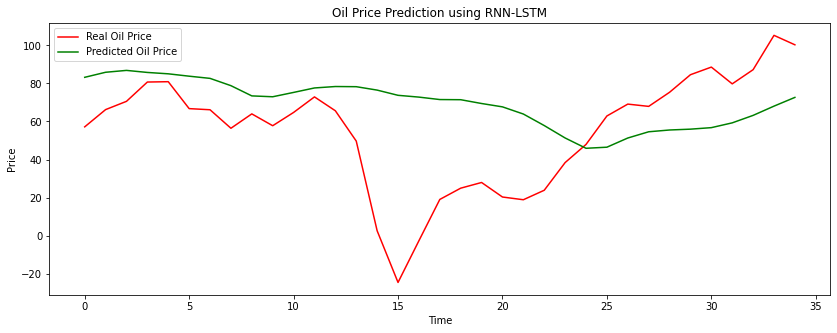

In [58]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Oil Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Oil Price')
plt.title('Oil Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()